In [12]:
import msprime, pyslim, tskit
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pprint
import statistics

Neutrality

In [13]:
path_to_trees = '/home/miguel/Desktop/HonoursProject/SLiMsimulations/tests2/Simulations'
inputFiles = os.listdir(path_to_trees)
inputFiles = [ x for x in inputFiles if x.endswith('.trees')]
chunks = [inputFiles[x:x+20] for x in range(0, len(inputFiles), 20)]
len(chunks)

5000

In [14]:
number_of_tracts = []
for List in chunks:
    count = []
    for file in List:

        coaAt9 = 0
        coaAt10 = 0
        ts = tskit.load(path_to_trees + '/' + file)
        samples = list(ts.samples())[0:2]
        tss = ts.simplify(samples=samples)
        heights = np.zeros(tss.num_trees+1)
        for tree in tss.trees():
            if tree.num_roots>1:
           #      heights[tree.index] = 10
                 heights[tree.index] = 2
            else:
                children = tree.children(tree.root)
                real_root = tree.root if len(children) > 1 else children[0]
                #heights[tree.index] = tree.time(real_root)
                heights[tree.index] = 1
        heights[-1] = heights[-2]
        breakpoints = list(tss.breakpoints())
        breakpoints = pd.DataFrame(breakpoints)
        heights = pd.DataFrame(heights)
        df = pd.concat([breakpoints, heights], axis=1)#Making a df with both breakpoints and heights
        df.columns =['Breakpoints', 'Height']
        df = df[df.Height != 1.0]  #only interested when height=2
        df = df[df.Breakpoints != 35000001.0] #If the tract ends with a heterozygous tract,this value would add an extra tract to the count
        count.append(len(df.index))
    
    number_of_tracts.append(sum(count))
number_of_tracts

[12,
 7,
 10,
 10,
 12,
 8,
 15,
 17,
 13,
 10,
 14,
 8,
 12,
 14,
 17,
 11,
 12,
 13,
 12,
 3,
 11,
 18,
 10,
 10,
 16,
 14,
 13,
 14,
 7,
 12,
 16,
 9,
 13,
 17,
 12,
 13,
 15,
 13,
 13,
 13,
 14,
 16,
 10,
 13,
 18,
 12,
 11,
 17,
 15,
 17,
 10,
 16,
 15,
 11,
 10,
 12,
 11,
 9,
 11,
 11,
 12,
 16,
 9,
 13,
 9,
 11,
 13,
 12,
 15,
 16,
 7,
 10,
 6,
 5,
 11,
 16,
 9,
 11,
 7,
 8,
 14,
 16,
 5,
 10,
 16,
 9,
 23,
 10,
 8,
 13,
 10,
 11,
 12,
 11,
 9,
 9,
 9,
 8,
 12,
 7,
 16,
 11,
 14,
 12,
 9,
 9,
 13,
 9,
 10,
 15,
 10,
 11,
 13,
 15,
 10,
 10,
 13,
 19,
 15,
 10,
 13,
 7,
 13,
 14,
 8,
 15,
 16,
 10,
 10,
 12,
 18,
 11,
 16,
 7,
 13,
 18,
 10,
 14,
 18,
 10,
 9,
 12,
 10,
 5,
 10,
 11,
 18,
 5,
 16,
 10,
 10,
 6,
 16,
 13,
 9,
 12,
 10,
 10,
 9,
 19,
 14,
 5,
 10,
 9,
 8,
 11,
 9,
 10,
 6,
 13,
 14,
 13,
 14,
 10,
 8,
 13,
 10,
 8,
 12,
 9,
 8,
 11,
 16,
 15,
 11,
 15,
 19,
 13,
 11,
 10,
 17,
 12,
 13,
 10,
 12,
 14,
 3,
 11,
 6,
 13,
 9,
 11,
 18,
 17,
 8,
 12,
 11,
 12,
 6,
 18,

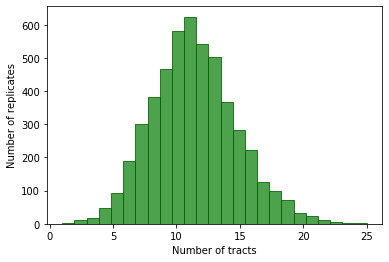

In [15]:
plt.hist(number_of_tracts, bins = 25, color = 'forestgreen', alpha = 0.8, edgecolor = 'darkgreen')
plt.xlabel("Number of tracts")
plt.ylabel("Number of replicates")
plt.savefig(r'/home/miguel/Desktop/HonoursProject/alltractnumbers/Neutrality_Distribution_of_Heterozygosity_tracts.png')

In [16]:
print(np.percentile(number_of_tracts, 95))
print(sum(number_of_tracts)/len(number_of_tracts))

17.0
11.346


1 homozygous lethal

In [23]:
path_to_trees = '/home/miguel/Desktop/HonoursProject/SLiMsimulations/Selection_sims/Homozygous_lethal_at_17500000/Simulations'
inputFiles = os.listdir(path_to_trees)
inputFiles = [ x for x in inputFiles if x.endswith('.trees')]
chunks = [inputFiles[x:x+20] for x in range(0, len(inputFiles), 20)]
len(chunks)

5000

In [25]:
number_of_tracts1 = []
for List in chunks:
    count = []
    for file in List:

        coaAt9 = 0
        coaAt10 = 0
        ts = tskit.load(path_to_trees + '/' + file)
        samples = list(ts.samples())[0:2]
        tss = ts.simplify(samples=samples)
        heights = np.zeros(tss.num_trees+1)
        for tree in tss.trees():
            if tree.num_roots>1:
           #      heights[tree.index] = 10
                 heights[tree.index] = 2
            else:
                children = tree.children(tree.root)
                real_root = tree.root if len(children) > 1 else children[0]
                #heights[tree.index] = tree.time(real_root)
                heights[tree.index] = 1
        heights[-1] = heights[-2]
        breakpoints = list(tss.breakpoints())
        breakpoints = pd.DataFrame(breakpoints)
        heights = pd.DataFrame(heights)
        df = pd.concat([breakpoints, heights], axis=1)#Making a df with both breakpoints and heights
        df.columns =['Breakpoints', 'Height']
        df = df[df.Height != 1.0]  #only interested when height=2
        df = df[df.Breakpoints != 35000001.0] #If the tract ends with a heterozygous tract,this value would add an extra tract to the count
        count.append(len(df.index))
    
    number_of_tracts1.append(sum(count))
number_of_tracts1

[31,
 29,
 33,
 36,
 35,
 35,
 30,
 35,
 27,
 30,
 35,
 32,
 28,
 34,
 28,
 25,
 33,
 33,
 29,
 31,
 29,
 31,
 24,
 35,
 37,
 29,
 32,
 26,
 29,
 32,
 29,
 30,
 29,
 31,
 32,
 27,
 25,
 28,
 25,
 33,
 29,
 28,
 31,
 29,
 31,
 30,
 32,
 24,
 31,
 28,
 30,
 28,
 29,
 29,
 30,
 29,
 26,
 32,
 30,
 30,
 29,
 29,
 29,
 26,
 23,
 31,
 30,
 32,
 29,
 29,
 30,
 29,
 30,
 30,
 28,
 30,
 28,
 34,
 31,
 32,
 29,
 30,
 31,
 31,
 34,
 37,
 30,
 27,
 31,
 29,
 35,
 25,
 29,
 31,
 31,
 32,
 29,
 34,
 29,
 37,
 31,
 28,
 24,
 27,
 30,
 27,
 30,
 27,
 31,
 28,
 31,
 31,
 24,
 30,
 29,
 31,
 31,
 34,
 27,
 28,
 26,
 32,
 35,
 30,
 29,
 41,
 31,
 27,
 26,
 28,
 30,
 32,
 30,
 27,
 31,
 31,
 32,
 29,
 27,
 27,
 27,
 28,
 30,
 29,
 32,
 27,
 29,
 34,
 27,
 30,
 29,
 30,
 27,
 29,
 28,
 32,
 36,
 28,
 29,
 31,
 31,
 28,
 28,
 33,
 34,
 27,
 26,
 29,
 28,
 29,
 34,
 31,
 26,
 32,
 28,
 33,
 30,
 35,
 28,
 33,
 27,
 35,
 29,
 27,
 29,
 37,
 29,
 28,
 29,
 35,
 36,
 33,
 29,
 27,
 32,
 28,
 30,
 26,
 27,
 28,


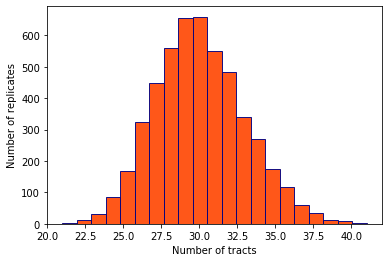

In [46]:
plt.hist(number_of_tracts1, bins = 21, color = 'orangered', alpha = 0.9, edgecolor = 'navy')
plt.xlabel("Number of tracts")
plt.ylabel("Number of replicates")
plt.savefig(r'/home/miguel/Desktop/HonoursProject/alltractnumbers/One_homo_lethal_Distribution_of_Heterozygosity_tracts.png')

In [27]:
print(np.percentile(number_of_tracts1, 95))
print(sum(number_of_tracts1)/len(number_of_tracts1))

35.0
29.9982


2 homozygous lethals

In [28]:
path_to_trees = '/home/miguel/Desktop/HonoursProject/SLiMsimulations/Selection_sims/2_lethals/Simulations'
inputFiles = os.listdir(path_to_trees)
inputFiles = [ x for x in inputFiles if x.endswith('.trees')]
chunks = [inputFiles[x:x+20] for x in range(0, len(inputFiles), 20)]
len(chunks)

5000

In [29]:
number_of_tracts2 = []
for List in chunks:
    count = []
    for file in List:

        coaAt9 = 0
        coaAt10 = 0
        ts = tskit.load(path_to_trees + '/' + file)
        samples = list(ts.samples())[0:2]
        tss = ts.simplify(samples=samples)
        heights = np.zeros(tss.num_trees+1)
        for tree in tss.trees():
            if tree.num_roots>1:
           #      heights[tree.index] = 10
                 heights[tree.index] = 2
            else:
                children = tree.children(tree.root)
                real_root = tree.root if len(children) > 1 else children[0]
                #heights[tree.index] = tree.time(real_root)
                heights[tree.index] = 1
        heights[-1] = heights[-2]
        breakpoints = list(tss.breakpoints())
        breakpoints = pd.DataFrame(breakpoints)
        heights = pd.DataFrame(heights)
        df = pd.concat([breakpoints, heights], axis=1)#Making a df with both breakpoints and heights
        df.columns =['Breakpoints', 'Height']
        df = df[df.Height != 1.0]  #only interested when height=2
        df = df[df.Breakpoints != 35000001.0] #If the tract ends with a heterozygous tract,this value would add an extra tract to the count
        count.append(len(df.index))
    
    number_of_tracts2.append(sum(count))
number_of_tracts2

[42,
 47,
 40,
 47,
 39,
 48,
 39,
 45,
 37,
 39,
 46,
 46,
 36,
 45,
 43,
 41,
 44,
 37,
 42,
 42,
 45,
 39,
 40,
 34,
 38,
 46,
 43,
 44,
 36,
 38,
 45,
 39,
 40,
 40,
 38,
 46,
 39,
 41,
 45,
 33,
 49,
 41,
 43,
 37,
 37,
 40,
 42,
 49,
 40,
 44,
 40,
 45,
 44,
 47,
 39,
 39,
 41,
 46,
 42,
 36,
 41,
 43,
 38,
 43,
 40,
 44,
 43,
 40,
 40,
 40,
 39,
 43,
 38,
 43,
 38,
 43,
 38,
 35,
 39,
 42,
 34,
 38,
 35,
 41,
 37,
 41,
 48,
 42,
 42,
 37,
 47,
 36,
 38,
 39,
 41,
 41,
 40,
 43,
 39,
 39,
 41,
 43,
 44,
 38,
 43,
 44,
 39,
 47,
 34,
 40,
 44,
 47,
 44,
 48,
 42,
 37,
 42,
 41,
 44,
 43,
 46,
 43,
 42,
 43,
 41,
 44,
 41,
 42,
 44,
 40,
 45,
 43,
 38,
 34,
 39,
 34,
 46,
 40,
 35,
 46,
 40,
 34,
 38,
 47,
 44,
 46,
 42,
 41,
 44,
 43,
 35,
 43,
 36,
 43,
 35,
 46,
 38,
 38,
 49,
 37,
 39,
 40,
 30,
 47,
 43,
 49,
 38,
 38,
 43,
 46,
 37,
 34,
 44,
 39,
 32,
 38,
 43,
 39,
 36,
 40,
 42,
 43,
 40,
 45,
 42,
 41,
 39,
 43,
 40,
 39,
 42,
 50,
 41,
 39,
 36,
 42,
 36,
 40,
 40,
 36,


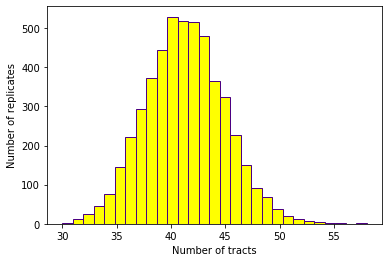

In [65]:
plt.hist(number_of_tracts2, bins = 29, color = 'yellow', alpha = 1, edgecolor = 'indigo')
plt.xlabel("Number of tracts")
plt.ylabel("Number of replicates")
plt.savefig(r'/home/miguel/Desktop/HonoursProject/alltractnumbers/two_homo_lethal_Distribution_of_Heterozygosity_tracts.png')

In [31]:
print(np.percentile(number_of_tracts2, 95))
print(sum(number_of_tracts2)/len(number_of_tracts2))

47.0
41.211


1 recessive lethal

In [32]:
path_to_trees = '/home/miguel/Desktop/HonoursProject/SLiMsimulations/Selection_sims/one_recessive_lethal/Simulations'
inputFiles = os.listdir(path_to_trees)
inputFiles = [ x for x in inputFiles if x.endswith('.trees')]
chunks = [inputFiles[x:x+20] for x in range(0, len(inputFiles), 20)]
len(chunks)

5000

In [33]:
number_of_tracts3 = []
for List in chunks:
    count = []
    for file in List:

        coaAt9 = 0
        coaAt10 = 0
        ts = tskit.load(path_to_trees + '/' + file)
        samples = list(ts.samples())[0:2]
        tss = ts.simplify(samples=samples)
        heights = np.zeros(tss.num_trees+1)
        for tree in tss.trees():
            if tree.num_roots>1:
           #      heights[tree.index] = 10
                 heights[tree.index] = 2
            else:
                children = tree.children(tree.root)
                real_root = tree.root if len(children) > 1 else children[0]
                #heights[tree.index] = tree.time(real_root)
                heights[tree.index] = 1
        heights[-1] = heights[-2]
        breakpoints = list(tss.breakpoints())
        breakpoints = pd.DataFrame(breakpoints)
        heights = pd.DataFrame(heights)
        df = pd.concat([breakpoints, heights], axis=1)#Making a df with both breakpoints and heights
        df.columns =['Breakpoints', 'Height']
        df = df[df.Height != 1.0]  #only interested when height=2
        df = df[df.Breakpoints != 35000001.0] #If the tract ends with a heterozygous tract,this value would add an extra tract to the count
        count.append(len(df.index))
    
    number_of_tracts3.append(sum(count))
number_of_tracts3

[17,
 17,
 10,
 18,
 22,
 22,
 14,
 21,
 13,
 7,
 19,
 20,
 17,
 12,
 15,
 17,
 23,
 20,
 15,
 17,
 22,
 18,
 20,
 13,
 14,
 13,
 16,
 15,
 23,
 15,
 9,
 27,
 13,
 20,
 15,
 24,
 18,
 13,
 12,
 12,
 17,
 20,
 18,
 10,
 19,
 14,
 16,
 17,
 24,
 19,
 24,
 10,
 7,
 18,
 22,
 25,
 21,
 14,
 20,
 17,
 16,
 19,
 11,
 16,
 18,
 19,
 12,
 19,
 15,
 22,
 19,
 21,
 23,
 16,
 20,
 16,
 16,
 25,
 10,
 17,
 9,
 20,
 18,
 17,
 21,
 21,
 19,
 17,
 17,
 19,
 14,
 21,
 20,
 13,
 20,
 20,
 16,
 14,
 19,
 13,
 11,
 18,
 10,
 10,
 18,
 16,
 13,
 11,
 29,
 11,
 19,
 21,
 16,
 16,
 12,
 20,
 20,
 24,
 11,
 19,
 14,
 23,
 19,
 11,
 8,
 13,
 14,
 20,
 14,
 11,
 27,
 16,
 14,
 13,
 15,
 21,
 14,
 9,
 13,
 16,
 15,
 17,
 11,
 12,
 18,
 16,
 10,
 13,
 13,
 23,
 18,
 17,
 10,
 17,
 19,
 12,
 12,
 12,
 22,
 15,
 18,
 18,
 22,
 21,
 10,
 18,
 12,
 12,
 5,
 13,
 15,
 20,
 18,
 11,
 9,
 15,
 14,
 30,
 17,
 16,
 16,
 16,
 17,
 13,
 16,
 18,
 18,
 20,
 19,
 19,
 22,
 10,
 15,
 11,
 10,
 14,
 8,
 18,
 17,
 11,
 25,
 17,

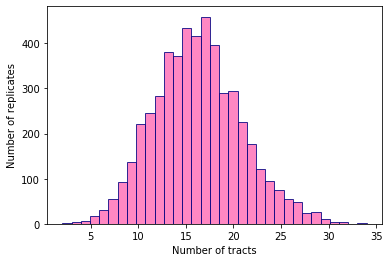

In [49]:
plt.hist(number_of_tracts3, bins = 33, color = 'hotpink', alpha = 0.8, edgecolor = 'navy')
plt.xlabel("Number of tracts")
plt.ylabel("Number of replicates")
plt.savefig(r'/home/miguel/Desktop/HonoursProject/alltractnumbers/One_recess_lethal_Distribution_of_Heterozygosity_tracts.png')

In [35]:
print(np.percentile(number_of_tracts3, 95))
print(sum(number_of_tracts3)/len(number_of_tracts3))

24.0
16.1816


2 recessive lethals, same chr

In [36]:
path_to_trees = '/home/miguel/Desktop/HonoursProject/SLiMsimulations/Selection_sims/recessive_lethal/Simulations'
inputFiles = os.listdir(path_to_trees)
inputFiles = [ x for x in inputFiles if x.endswith('.trees')]
chunks = [inputFiles[x:x+20] for x in range(0, len(inputFiles), 20)]
len(chunks)

5000

In [37]:
number_of_tracts4 = []
for List in chunks:
    count = []
    for file in List:

        coaAt9 = 0
        coaAt10 = 0
        ts = tskit.load(path_to_trees + '/' + file)
        samples = list(ts.samples())[0:2]
        tss = ts.simplify(samples=samples)
        heights = np.zeros(tss.num_trees+1)
        for tree in tss.trees():
            if tree.num_roots>1:
           #      heights[tree.index] = 10
                 heights[tree.index] = 2
            else:
                children = tree.children(tree.root)
                real_root = tree.root if len(children) > 1 else children[0]
                #heights[tree.index] = tree.time(real_root)
                heights[tree.index] = 1
        heights[-1] = heights[-2]
        breakpoints = list(tss.breakpoints())
        breakpoints = pd.DataFrame(breakpoints)
        heights = pd.DataFrame(heights)
        df = pd.concat([breakpoints, heights], axis=1)#Making a df with both breakpoints and heights
        df.columns =['Breakpoints', 'Height']
        df = df[df.Height != 1.0]  #only interested when height=2
        df = df[df.Breakpoints != 35000001.0] #If the tract ends with a heterozygous tract,this value would add an extra tract to the count
        count.append(len(df.index))
    
    number_of_tracts4.append(sum(count))
number_of_tracts4

[10,
 14,
 16,
 9,
 10,
 9,
 21,
 9,
 23,
 8,
 19,
 11,
 12,
 19,
 16,
 15,
 10,
 17,
 15,
 11,
 18,
 18,
 13,
 22,
 10,
 9,
 22,
 10,
 12,
 8,
 16,
 19,
 10,
 19,
 24,
 14,
 7,
 18,
 14,
 22,
 17,
 18,
 15,
 5,
 18,
 12,
 23,
 17,
 10,
 12,
 15,
 12,
 9,
 18,
 14,
 10,
 16,
 21,
 16,
 13,
 11,
 21,
 20,
 15,
 12,
 18,
 14,
 18,
 15,
 11,
 15,
 18,
 11,
 14,
 13,
 13,
 12,
 15,
 14,
 23,
 17,
 21,
 10,
 13,
 13,
 10,
 13,
 6,
 22,
 14,
 11,
 14,
 13,
 11,
 20,
 18,
 12,
 23,
 14,
 13,
 15,
 18,
 14,
 17,
 23,
 16,
 19,
 11,
 18,
 16,
 18,
 7,
 14,
 9,
 11,
 28,
 16,
 14,
 23,
 13,
 32,
 16,
 6,
 12,
 10,
 17,
 20,
 16,
 13,
 20,
 17,
 14,
 13,
 17,
 8,
 13,
 13,
 13,
 25,
 12,
 10,
 14,
 20,
 23,
 17,
 26,
 15,
 12,
 17,
 22,
 10,
 19,
 10,
 19,
 17,
 12,
 12,
 23,
 15,
 15,
 12,
 6,
 14,
 15,
 16,
 25,
 13,
 12,
 12,
 15,
 13,
 11,
 16,
 11,
 15,
 20,
 19,
 16,
 15,
 9,
 13,
 9,
 4,
 17,
 20,
 8,
 12,
 22,
 15,
 16,
 10,
 17,
 15,
 15,
 17,
 12,
 22,
 9,
 18,
 11,
 23,
 16,
 24,
 10,


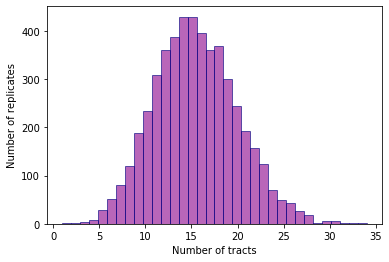

In [52]:
plt.hist(number_of_tracts4, bins = 34, color = 'darkmagenta', alpha = 0.6, edgecolor = 'navy')
plt.xlabel("Number of tracts")
plt.ylabel("Number of replicates")
plt.savefig(r'/home/miguel/Desktop/HonoursProject/alltractnumbers/two_recess_lethal_same_chr_Distribution_of_Heterozygosity_tracts.png')

In [39]:
print(np.percentile(number_of_tracts4, 95))
print(sum(number_of_tracts4)/len(number_of_tracts4))

23.0
15.4274


2 recessive lethals, diff chrs

In [40]:
path_to_trees = '/home/miguel/Desktop/HonoursProject/SLiMsimulations/Selection_sims/recessive_lethals_on_different/Simulations'
inputFiles = os.listdir(path_to_trees)
inputFiles = [ x for x in inputFiles if x.endswith('.trees')]
chunks = [inputFiles[x:x+20] for x in range(0, len(inputFiles), 20)]
len(chunks)

5001

In [41]:
number_of_tracts5 = []
for List in chunks:
    count = []
    for file in List:

        coaAt9 = 0
        coaAt10 = 0
        ts = tskit.load(path_to_trees + '/' + file)
        samples = list(ts.samples())[0:2]
        tss = ts.simplify(samples=samples)
        heights = np.zeros(tss.num_trees+1)
        for tree in tss.trees():
            if tree.num_roots>1:
           #      heights[tree.index] = 10
                 heights[tree.index] = 2
            else:
                children = tree.children(tree.root)
                real_root = tree.root if len(children) > 1 else children[0]
                #heights[tree.index] = tree.time(real_root)
                heights[tree.index] = 1
        heights[-1] = heights[-2]
        breakpoints = list(tss.breakpoints())
        breakpoints = pd.DataFrame(breakpoints)
        heights = pd.DataFrame(heights)
        df = pd.concat([breakpoints, heights], axis=1)#Making a df with both breakpoints and heights
        df.columns =['Breakpoints', 'Height']
        df = df[df.Height != 1.0]  #only interested when height=2
        df = df[df.Breakpoints != 35000001.0] #If the tract ends with a heterozygous tract,this value would add an extra tract to the count
        count.append(len(df.index))
    
    number_of_tracts5.append(sum(count))
number_of_tracts5

[23,
 22,
 16,
 22,
 25,
 31,
 21,
 20,
 19,
 11,
 23,
 20,
 16,
 22,
 20,
 21,
 16,
 30,
 25,
 19,
 28,
 17,
 20,
 21,
 16,
 24,
 23,
 16,
 42,
 15,
 17,
 19,
 26,
 25,
 15,
 12,
 23,
 15,
 19,
 22,
 17,
 30,
 14,
 19,
 23,
 23,
 21,
 22,
 19,
 24,
 23,
 23,
 29,
 29,
 24,
 20,
 27,
 25,
 25,
 20,
 27,
 27,
 23,
 20,
 24,
 33,
 20,
 24,
 22,
 22,
 10,
 24,
 16,
 19,
 25,
 29,
 17,
 17,
 22,
 25,
 27,
 22,
 20,
 19,
 21,
 14,
 21,
 17,
 31,
 21,
 26,
 18,
 24,
 21,
 21,
 30,
 17,
 27,
 20,
 27,
 26,
 18,
 27,
 29,
 19,
 15,
 20,
 18,
 17,
 35,
 22,
 26,
 24,
 21,
 21,
 22,
 22,
 20,
 21,
 21,
 14,
 29,
 14,
 27,
 16,
 13,
 22,
 20,
 27,
 20,
 22,
 27,
 21,
 20,
 25,
 13,
 15,
 17,
 17,
 31,
 20,
 14,
 26,
 19,
 13,
 20,
 20,
 13,
 19,
 23,
 28,
 28,
 24,
 16,
 18,
 24,
 31,
 23,
 23,
 27,
 22,
 14,
 18,
 18,
 21,
 30,
 19,
 24,
 9,
 21,
 19,
 26,
 21,
 22,
 23,
 17,
 14,
 24,
 17,
 25,
 17,
 25,
 27,
 22,
 22,
 22,
 28,
 23,
 17,
 25,
 19,
 25,
 14,
 14,
 22,
 20,
 15,
 30,
 17,
 14,
 

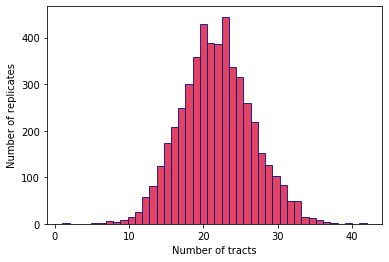

In [76]:
plt.hist(number_of_tracts5, bins = 42, color = 'crimson', alpha = 0.8, edgecolor = 'navy')
plt.xlabel("Number of tracts")
plt.ylabel("Number of replicates")
plt.savefig(r'/home/miguel/Desktop/HonoursProject/alltractnumbers/two_recess_lethal_diff_chr_Distribution_of_Heterozygosity_tracts.png')

In [43]:
print(np.percentile(number_of_tracts5, 95))
print(sum(number_of_tracts5)/len(number_of_tracts5))

30.0
21.783043391321737
